In [2]:
import http.client
import json
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
conn = http.client.HTTPSConnection("streaming.bitquery.io")
payload = json.dumps({
   "query": "query MyQuery {\n  EVM(dataset: combined, network: eth) {\n    DEXTradeByTokens(\n      limit: {count: 15}\n      where: {Block: {Time: {after: \"2023-09-01T00:00:00Z\", before: \"2023-11-29T00:00:00Z\"}}, Trade: {Dex: {ProtocolName: {in: \"uniswap_v2\"}}}}\n      orderBy: {descendingByField: \"count\"}\n    ) {\n      Trade {\n        Currency {\n          Name\n          SmartContract\n          Symbol\n        }\n      }\n      count(selectWhere: {lt: \"100\"})\n    }\n  }\n}\n",
   "variables": "{}"
})
headers = {
   'Content-Type': 'application/json',
   'X-API-KEY': 'BQYdO11cbRp3kwtJsrLSTOHnuapbJL48'
}
conn.request("POST", "/graphql", payload, headers)
res = conn.getresponse()
data = res.read()
res = json.loads(data.decode("utf-8"))
print(res)

{'data': {'EVM': {'DEXTradeByTokens': [{'Trade': {'Currency': {'Name': 'P E P E', 'SmartContract': '0x09b4747a8cb48e70cab82a46bf1027b792fbf9a9', 'Symbol': 'P E P E'}}, 'count': '99'}, {'Trade': {'Currency': {'Name': 'UNKNOWN', 'SmartContract': '0xa0792d38d09c6de5b9fb59ff1e60055b6815a23c', 'Symbol': 'UNKNOWN'}}, 'count': '99'}, {'Trade': {'Currency': {'Name': 'World Wide Web', 'SmartContract': '0xb672f45d230989ef2ec880fcfe51bb349fe16cb9', 'Symbol': '1994'}}, 'count': '99'}, {'Trade': {'Currency': {'Name': 'PepePotterInu6900', 'SmartContract': '0x6755d358de51dddb43065bbb8b430bd4fd62b92d', 'Symbol': 'PPX'}}, 'count': '99'}, {'Trade': {'Currency': {'Name': 'GOD FATHER', 'SmartContract': '0x02faa9db4d66d3cc1e0611078227db381539309c', 'Symbol': 'FATHER'}}, 'count': '99'}, {'Trade': {'Currency': {'Name': 'xAI Grok', 'SmartContract': '0x5b8f9e8863f9c7b11992a7a71c0c111bf49a7efc', 'Symbol': 'GROK'}}, 'count': '99'}, {'Trade': {'Currency': {'Name': 'DHL Moonbox', 'SmartContract': '0x7e1da3c5ba717e

In [6]:
df = pd.json_normalize(res['data']['EVM']['DEXTradeByTokens'])
df

,count,Trade.Currency.Name,Trade.Currency.SmartContract,Trade.Currency.Symbol
0,99,P E P E,0x09b4747a8cb48e70cab82a46bf1027b792fbf9a9,P E P E
1,99,UNKNOWN,0xa0792d38d09c6de5b9fb59ff1e60055b6815a23c,UNKNOWN
2,99,World Wide Web,0xb672f45d230989ef2ec880fcfe51bb349fe16cb9,1994
3,99,PepePotterInu6900,0x6755d358de51dddb43065bbb8b430bd4fd62b92d,PPX
4,99,GOD FATHER,0x02faa9db4d66d3cc1e0611078227db381539309c,FATHER
5,99,xAI Grok,0x5b8f9e8863f9c7b11992a7a71c0c111bf49a7efc,GROK
6,99,DHL Moonbox,0x7e1da3c5ba717e0309bc927d368dd04d2bcb6e9c,DMOON
7,99,Squirrel Onion,0x11cda5f4778df2575021f30b611f59ebf0eb8bc7,белкалук
8,99,WojakOfWallStree3.0,0xf151a7ad59319ed109c891d4acf906ba4123e65e,STONKS
9,99,RonWeasleyTrumpZelda666Inu,0x0c16a22a66cc354896570be6e914a68317f8b67a,BNB


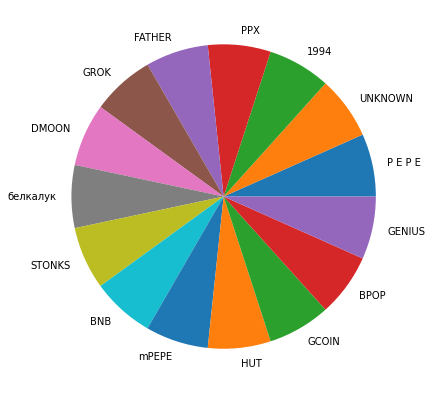

In [7]:
fig = plt.figure(figsize= (7,7))
plt.pie(df['count'], labels =  df['Trade.Currency.Symbol'])
plt.show()